# Categorical Encoding of dataset

In [1]:
import pandas as pd
import numpy as np
import gc
import joblib
import os
import warnings

In [2]:
df = pd.read_csv('../input/cat-in-the-dat-ii/train.csv')

In [3]:
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,NaN,0
599996,599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,NaN,3.0,0
599997,599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0
599998,599998,1.0,1.0,0.0,F,Y,NaN,Polygon,Axolotl,NaN,...,c1a8374a0,1.0,Master,Warm,m,X,Ey,1.0,5.0,0


### Nominal Variables
Nominal variables are variables that have two or more categories which do not
have any kind of order associated with them. For example, if gender is classified
into two groups, i.e. male and female, it can be considered as a nominal variable.
* male and femake

### Ordinal variables
Ordinal variables, on the other hand, have “levels” or categories with a particular
order associated with them. For example, an ordinal categorical variable can be a
feature with three different levels: low, medium and high. Order is important.

* low medium high (order is imp)

### Cyclic variables

“cycles” for example, days in a week: Sunday, Monday, Tuesday, Wednesday,
Thursday, Friday and Saturday.

In the dataset we have all type of data
* Binary
* Nominal
* Ordinal 
* Cyclic 

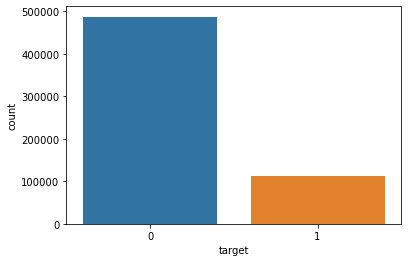

In [4]:
# check the target
import seaborn as sns
sns.countplot(df['target'])

We see that the target is skewed and thus the best metric for this binary
classification problem would be Area Under the ROC Curve (AUC). We can use
precision and recall too, but AUC combines these two metrics. Thus, we will be
using AUC to evaluate the model that we build on this dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

Overall, there are:
* Five binary variables
* Ten nominal variables
* Six ordinal variables
* Two cyclic variables
* And a target variable

Let's check Ord_2 category

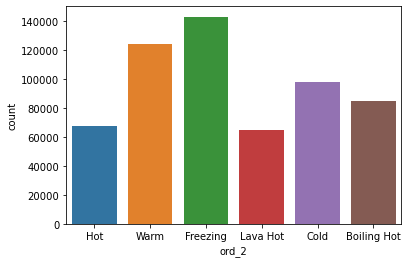

In [6]:
sns.countplot(df['ord_2'])

# Copy same dataframe

In [7]:
df1 = df.copy()

# Label mapping

Doing it manually

In [8]:
mapping = {
"Freezing": 0,
"Warm": 1,
"Cold": 2,
"Boiling Hot": 3,
"Hot": 4,
"Lava Hot": 5
}

df1.loc[:, "ord_2"] = df1.ord_2.map(mapping)

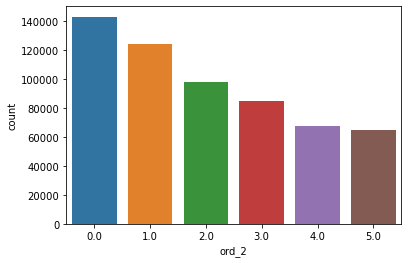

In [9]:
sns.countplot(df1['ord_2'])

# Label Encoding

This type of encoding of categorical variables is known as Label Encoding, i.e.,
we are encoding every category as a numerical label.
We can do the same by using LabelEncoder from scikit-learn.

I use fillna from pandas. The reason is LabelEncoder from scikit-
learn does not handle NaN values, and ord_2 column has NaN values in it.

If there is a NaN you will get an error. 

We can use this directly in many tree-based models:
* Decision trees
* Random forest
* Extra Trees
* Or any kind of boosted trees model
  * XGBoost
  * GBM
  * LightGBM

In [10]:
df2 = df.copy()

# Check NaN values in df from heatmap

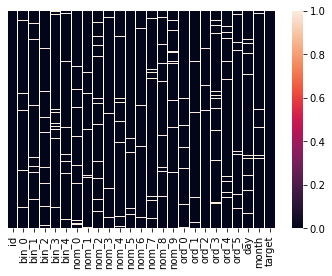

In [11]:
#Heat map of NaN
sns.heatmap(df2.isnull(), yticklabels=False)

In [12]:
from sklearn import preprocessing

#fill NaN values in ord_2 column
df2.loc[:, "ord_2"] = df2.ord_2.fillna("NONE")

lbl_enc = preprocessing.LabelEncoder()
df2.loc[:, "ord_2"] = lbl_enc.fit_transform(df2.ord_2.values)

In [13]:
df2.ord_2.value_counts()

2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: ord_2, dtype: int64

### This type of encoding **cannot be used in linear models, support vector machines or neural networks** as they expect **data to be normalized (or standardized)**. For these types of models, we can **binarize** the data.


* Freezing --> 0 --> 0 0 0
* Warm --> 1 --> 0 0 1
* Cold --> 2 --> 0 1 0
* Boiling Hot --> 3 --> 0 1 1
* Hot --> 4 --> 1 0 0
* Lava Hot --> 5 --> 1 0 1

This is just converting the categories to numbers and then converting them to their
binary representation. We are thus splitting one feature into three (in this case)
features (or columns).

# One Hot Encoding 

One hot encoding is a binary encoding too in the sense that there are only two
values, 0s and 1s. However, it must be noted that it’s not a binary representation.

* Freezing    0 0 0 0 0 1
* Warm        0 0 0 0 1 0
* Cold        0 0 0 1 0 0
* Boiling Hot 0 0 1 0 0 0
* Hot         0 1 0 0 0 0
* Lava Hot    1 0 0 0 0 0

Dense array size is much larger than the one with binarization.
However, the size of the sparse array is much less.

In [14]:
import numpy as np
from sklearn import preprocessing

example = np.random.randint(1000, size=1000000)

# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array

#Note that Spearse matrix is false
ohe = preprocessing.OneHotEncoder(sparse=False)

# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))

ohe_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse=True)

# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))

ohe_example

<1000000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

#### Another way, use numerical values in Ordinal values

just replace ord_2 column with its count values, we have converted it to a
feature which is kind of numerical now. We can create a new column or replace this
column by using the transform function of pandas along with groupby.

In [16]:
df3 = df.copy()
df3[df3.ord_2 == "Boiling Hot"].shape

(84790, 25)

In [17]:
df3.groupby(["ord_2"])["id"].count()

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

In [18]:
df3.groupby(["ord_2"])["id"].transform("count")

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

# Feature expantion

You can add counts of all the features or can also replace them or maybe group by
multiple columns and their counts.

In [19]:
df3.groupby(["ord_1","ord_2"])["id"].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,Boiling Hot,15634
1,Contributor,Cold,17734
2,Contributor,Freezing,26082
3,Contributor,Hot,12428
4,Contributor,Lava Hot,11919
5,Contributor,Warm,22774
6,Expert,Boiling Hot,19477
7,Expert,Cold,22956
8,Expert,Freezing,33249
9,Expert,Hot,15792


### Adding two columns and make a new feature

we have combined ord_1 and ord_2 by an underscore, and before that, we
convert these columns to string types. Note that NaN will also convert to string. But
it’s okay. We can also treat NaN as a new category. Thus, we have a new feature
which is a combination of these two features. You can also combine more than three
columns or four or even more.

In [20]:
df3["new_feature"] = (df3.ord_1.astype(str) + "_"+  df3.ord_2.astype(str))

In [21]:
df3['new_feature']

0                 Contributor_Hot
1                Grandmaster_Warm
2                    nan_Freezing
3                 Novice_Lava Hot
4                Grandmaster_Cold
                   ...           
599995            Novice_Freezing
599996         Novice_Boiling Hot
599997       Contributor_Freezing
599998                Master_Warm
599999    Contributor_Boiling Hot
Name: new_feature, Length: 600000, dtype: object

* fill the NaN values (this is very important!)
* convert them to integers by applying label encoding using LabelEncoder of scikit-learn or by using a mapping dictionary. If you didn’t fill up NaN values with something, you might have to take care of them in this step
* create one-hot encoding. Yes, you can skip binarization!
* go for modelling!

In [23]:
#fill the NaN values
df3.ord_2.fillna('NONE').value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

# Label encoding in train and test datasets

# COMBINING TRAIN AND TEST DATA

If you have a fixed test set, you can add your test data to training to know about the
categories in a given feature. This is very similar to semi-supervised learning in
which you use data which is not available for training to improve your model. This
will also take care of rare values that appear very less number of times in training
data but are in abundance in test data. Your model will be more robust.

**Many people think that this idea overfits. It may or may not overfit. There is a
simple fix for that. If you design your cross-validation in such a way that it
replicates the prediction process when you run your model on test data, then it’s
never going to overfit.** It means that the first step should be the separation of folds,
and in each fold, you should apply the same pre-processing that you want to apply
to test data. Suppose you want to concatenate training and test data, then in each
fold you must concatenate training and validation data and also make sure that your
validation dataset replicates the test set. In this specific case, you must design your
validation sets in such a way that it has categories which are “unseen” in the training
set.

In [24]:
df10 = pd.read_csv('../input/cat-in-the-dat-ii/test.csv')
df10

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,999995,0.0,0.0,1.0,T,N,Red,Trapezoid,Axolotl,Costa Rica,...,c1a4acfaf,45a68dd2e,2.0,Expert,Warm,n,R,dp,2.0,12.0
399996,999996,0.0,0.0,0.0,F,N,Red,Polygon,Dog,Russia,...,220190c9e,e48348d66,1.0,Contributor,NaN,n,X,US,1.0,5.0
399997,999997,0.0,0.0,1.0,T,N,Red,Triangle,Hamster,NaN,...,cc5495ab3,47021df0d,1.0,Grandmaster,Boiling Hot,m,P,TL,1.0,6.0
399998,999998,0.0,0.0,0.0,F,Y,Red,Circle,Dog,Costa Rica,...,32b33a4b4,e4bf32721,3.0,Novice,Lava Hot,h,L,DI,2.0,11.0


In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('../input/cat-in-the-dat-ii/train.csv')
test = pd.read_csv('../input/cat-in-the-dat-ii/test.csv')

#create a fake target column for test data since this column doesn't exist
test.loc[:,'target'] = -1

data =  pd.concat([train,test]).reset_index(drop = True)

features = [x for x in train.columns if x not in ['id','target']]

for feat in features:
    #create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()
    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!
    temp_col = data[feat].fillna("NONE").astype(str).values
    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)
# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

In [36]:
train

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0,0,3,5,3,6,...,27,2,0,3,3,21,57,5,5,0
1,1,1,1,0,0,2,3,4,0,5,...,2113,2,2,6,5,24,151,6,9,0
2,2,0,1,0,0,0,3,1,3,0,...,1400,2,4,2,14,16,106,4,11,0
3,3,2,0,0,0,0,3,0,3,3,...,2168,0,5,4,1,2,46,2,5,0
4,4,0,2,0,2,0,3,6,3,2,...,1748,2,2,1,8,2,51,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0,1,0,2,0,3,2,0,4,...,13,2,5,2,1,18,22,4,12,0
599996,599996,1,0,0,2,2,0,2,2,2,...,1403,1,5,0,14,13,164,7,5,0
599997,599997,0,0,0,0,2,3,0,0,6,...,571,1,0,2,14,7,42,6,7,0
599998,599998,1,1,0,0,2,2,2,0,5,...,1712,0,3,6,13,24,18,0,7,0


# Adding a 'rare' category when there are very less number of whereas, dataset is very large

We see that some values appear only a couple thousand times, and some appear
almost 40000 times. NaNs are also seen a lot. Please note that I have removed some
values from the output.

We can now define our criteria for calling a value “rare”. Let’s say the requirement
for a value being rare in this column is a count of less than 2000. So, it seems, J and
L can be marked as rare values.

In [37]:
df5 = df.copy()
df5.ord_4 = df5.ord_4.fillna("NONE")
df5.loc[df5["ord_4"].value_counts()[df5["ord_4"]].values < 2000,"ord_4"] = "RARE"
df5.ord_4.value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: ord_4, dtype: int64

# Remember

# linear models -----> One hot encoding

# tree models -----> label encoding

### solving problems with one hot encoder

# first create folds

In [39]:
from sklearn import model_selection
df = pd.read_csv('../input/cat-in-the-dat-ii/train.csv')
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop= True)
y = df.target.values
kf = model_selection.StratifiedKFold(n_splits=5)
for f,(t_,v_) in enumerate(kf.split(X =df, y = y)):
    df.loc[v_,'kfold'] = f
df.to_csv('trian_fold.csv',index = False)

# Now create model

In [40]:
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

df = pd.read_csv('./trian_fold.csv')
df.kfold.value_counts() 

4    120000
3    120000
2    120000
1    120000
0    120000
Name: kfold, dtype: int64

In [43]:
print(df[df.kfold == 2].target.value_counts())
print(df[df.kfold == 3].target.value_counts())

0    97535
1    22465
Name: target, dtype: int64
0    97536
1    22464
Name: target, dtype: int64


In [47]:
import warnings
warnings.filterwarnings('ignore')

def run(fold):

    df = pd.read_csv('./trian_fold.csv')

    features = [f for f in df.columns if f not in ('id','kfold','target')]

    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesn’t matter because all are categories

    for col in features:
        df.loc[:,col] = df[col].astype(str).fillna('NONE')
    df_train = df[df.kfold != fold].reset_index(drop = True)
    df_test = df[df.kfold == fold].reset_index(drop = True)

    ohe = preprocessing.OneHotEncoder()

    full_data = pd.concat([df_train[features],df_test[features]],axis = 0)
    ohe.fit(full_data[features])

    X_train = ohe.transform(df_train[features])

    X_test = ohe.transform(df_test[features])

    model = linear_model.LogisticRegression()

    model.fit(X_train,df_train.target.values)

    prediction = model.predict_proba(X_test)[:, 1]

    auc = metrics.roc_auc_score(df_test.target.values,prediction)

    print(auc)


if __name__ =='__main__':
    for i in range(1,5):
        run(i)

0.7890982320247975
0.786955146338093
0.7863980809072877
0.7861535094383736


# TREE MODEL with LABEL ENCODER

## Do same thing for label encoder also

# Again cross validation

In [49]:
from sklearn import model_selection
df = pd.read_csv('../input/cat-in-the-dat-ii/train.csv')
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop= True)
y = df.target.values
kf = model_selection.StratifiedKFold(n_splits=5)
for f,(t_,v_) in enumerate(kf.split(X =df, y = y)):
    df.loc[v_,'kfold'] = f
df.to_csv('trian_fold.csv',index = False)

In [ ]:
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing

def run(fold):

    df = pd.read_csv('./trian_fold.csv')

    features = [f for f in df.columns if f not in ('id','kfold','target')]

    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesn’t matter because all are categories

    for col in features:
        df.loc[:,col] = df[col].astype(str).fillna('NONE')
        
    for col in features:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(df[col])
        df.loc[:,col] = lbl.transform(df[col])
           
    df_train = df[df.kfold != fold].reset_index(drop = True)
    df_test = df[df.kfold == fold].reset_index(drop = True)

    X_train = df_train[features].values

    X_test = df_test[features].values

    model = ensemble.RandomForestClassifier(n_jobs=-1)

    model.fit(X_train,df_train.target.values)

    prediction = model.predict_proba(X_test)[:, 1]

    auc = metrics.roc_auc_score(df_test.target.values,prediction)

    print(f'FOLD = {fold},AUC = {auc}')


if __name__ =='__main__':
    for i in range(1,5):
        run(i)

FOLD = 1,AUC = 0.716715588125968
FOLD = 2,AUC = 0.7173553908427651


# Target Encoding

One more way of feature engineering from categorical features is to use target
encoding. However, you have to be very careful here as this might overfit your
model. Target encoding is a technique in which you map each category in a given
feature to its mean target value, but this must always be done in a cross-validated
manner. It means that the first thing you do is create the folds, and then use those
folds to create target encoding features for different columns of the data in the same
way you fit and predict the model on folds. So, if you have created 5 folds, you have
to create target encoding 5 times such that in the end, you have encoding for
variables in each fold which are not derived from the same fold. And then when
you fit your model, you must use the same folds again. Target encoding for unseen
test data can be derived from the full training data or can be an average of all the 5
folds.